# Análise de Dados das Taxas de Suicídios no Brasil

In [1]:
import pandas as pd
import seaborn as sb
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90


In [2]:
filename = 'master.csv'
df = pd.read_csv(filename)

In [3]:
df.shape

(27820, 12)

In [4]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 1.9+ MB


In [6]:
df.sample(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
21261,Saint Kitts and Nevis,1990,female,25-34 years,0,2600,0.00,Saint Kitts and Nevis1990,NaN,"208,740,444",5339,Boomers
23086,Slovenia,1999,male,35-54 years,184,293300,62.73,Slovenia1999,NaN,"22,689,994,990",12041,Boomers
20389,Republic of Korea,1998,female,75+ years,230,684600,33.60,Republic of Korea1998,NaN,"374,241,351,752",8624,G.I. Generation
14099,Kiribati,1995,female,25-34 years,0,6640,0.00,Kiribati1995,NaN,"56,338,028",855,Generation X
4225,Brazil,1989,female,75+ years,44,1090428,4.04,Brazil1989,NaN,"425,595,310,000",3310,G.I. Generation
14194,Kuwait,1986,male,25-34 years,5,238400,2.10,Kuwait1986,NaN,"17,903,681,693",11661,Boomers
22244,Seychelles,2003,male,55-74 years,1,3425,29.20,Seychelles2003,NaN,"705,704,816",9001,Silent
23158,Slovenia,2005,male,35-54 years,152,314730,48.30,Slovenia2005,0.857,"36,346,974,008",19012,Boomers
25975,Turkmenistan,2008,female,15-24 years,64,537815,11.90,Turkmenistan2008,NaN,"19,271,523,179",4368,Millenials
24735,Switzerland,1995,female,15-24 years,28,419100,6.68,Switzerland1995,0.846,"342,617,007,104",51774,Generation X


In [7]:
mascbr= df.query('country == "Brazil" and sex == "male"')

In [8]:
fembr= df.query('country == "Brazil" and sex == "female"')

In [9]:
mascbr = mascbr.pivot(columns='age', values='suicides_no', index='year')

In [10]:
fembr = fembr.pivot(columns='age', values='suicides_no', index='year')

In [11]:
mascbr = mascbr[['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']]

In [12]:
fembr = fembr[['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']]

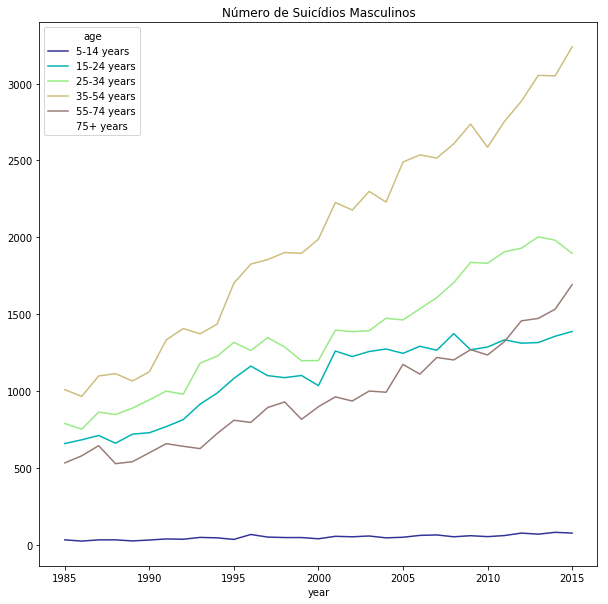

In [13]:
mascbr.plot(figsize=(10, 10), title='Número de Suicídios Masculinos', colormap='terrain')

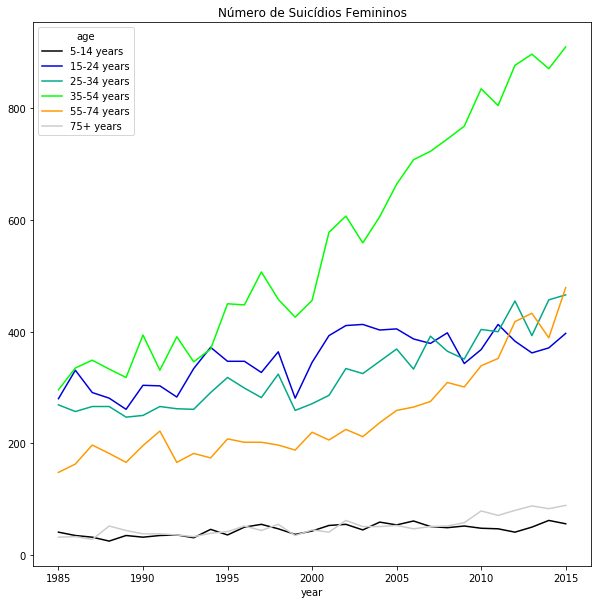

In [14]:
fembr.plot(figsize=(10, 10), title='Número de Suicídios Femininos', colormap='nipy_spectral')